# EDA for student performance data

This Notebook focuses on the EDA of the student performance data

# 1 - Import required packages

In [4]:
# Import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # Reduces 


# 2 - Data collection

## 2.1 - Import dataset CSV file

In [8]:
df = pd.read_csv('data/data.csv')

## 2.2 - Basic information on file

### Shape

In [12]:
df.shape

(1000, 8)

### Head

In [9]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Tail

In [10]:
df.tail(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# 3 - Data Validation

List of basic checks
 - Missing values
 - Duplicates
 - data types
 - Unique values present
 - Statistics of each attribute
 - Distinct categories in each column

## 3.1 - Missing values

### NO missing entries

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## 3.2 - Duplication

### NO duplicated entries

In [14]:
df.duplicated().sum()

0

## 3.3 - Check data types

### NO correction required

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 - Check # of unique values

In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 - Print statistics of dataset

### The means and SDs for numeric variables are close ~68 and ~15 respectively
### minimum for math scores is 0, while others are 15


In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3.6 - Check categories available


In [35]:
cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']

for col in cat_cols:
    print(f'Categories in ##{col}## are: {df[col].unique()}')
    print("\n")

Categories in ##gender## are: ['female' 'male']


Categories in ##race_ethnicity## are: ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in ##parental_level_of_education## are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in ##lunch## are: ['standard' 'free/reduced']


Categories in ##test_preparation_course## are: ['none' 'completed']




## 3.7 - Adding total score and average scores

In [36]:
df.columns.values

array(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'], dtype=object)

In [41]:
score_cols = ['math_score', 'reading_score','writing_score']

df['average_score'] = df[score_cols].mean(axis = 1)
df['total_score'] = df[score_cols].sum(axis = 1)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 4 - Visualizations

1. Distribution of scores
2. 

## 4.1 - Histograms/Kernel density plots

### Female students show a generally higher average scores compared to males

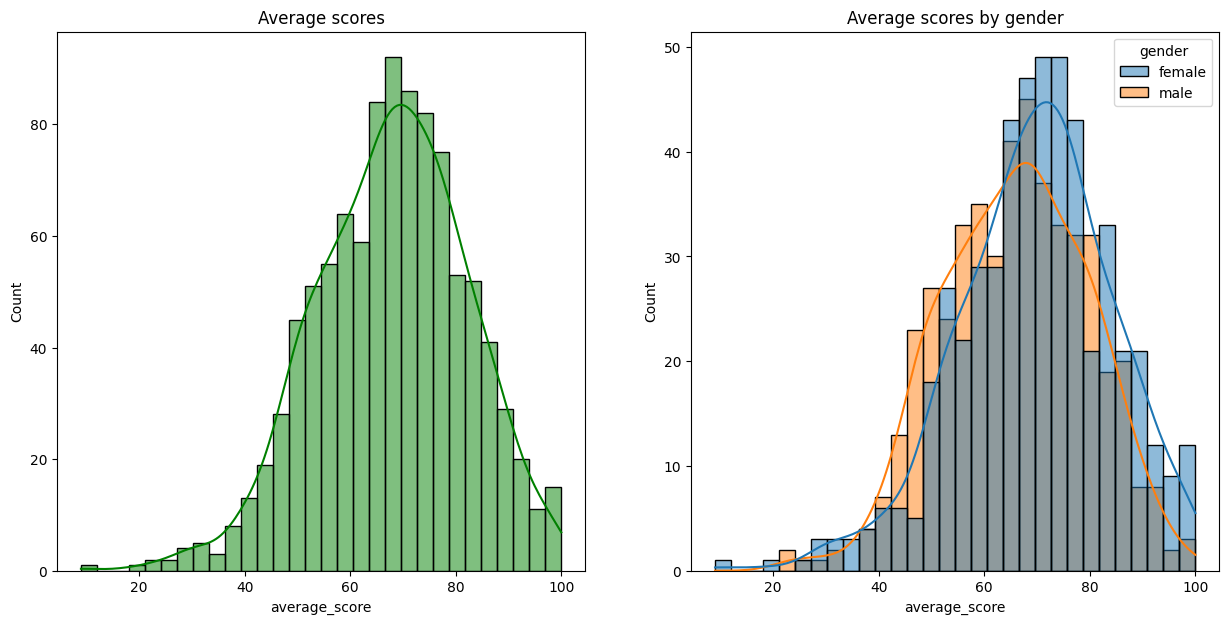

In [44]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, color = 'g')
plt.title("Average scores")

plt.subplot(122)
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, hue = 'gender')
plt.title("Average scores by gender")

plt.show()

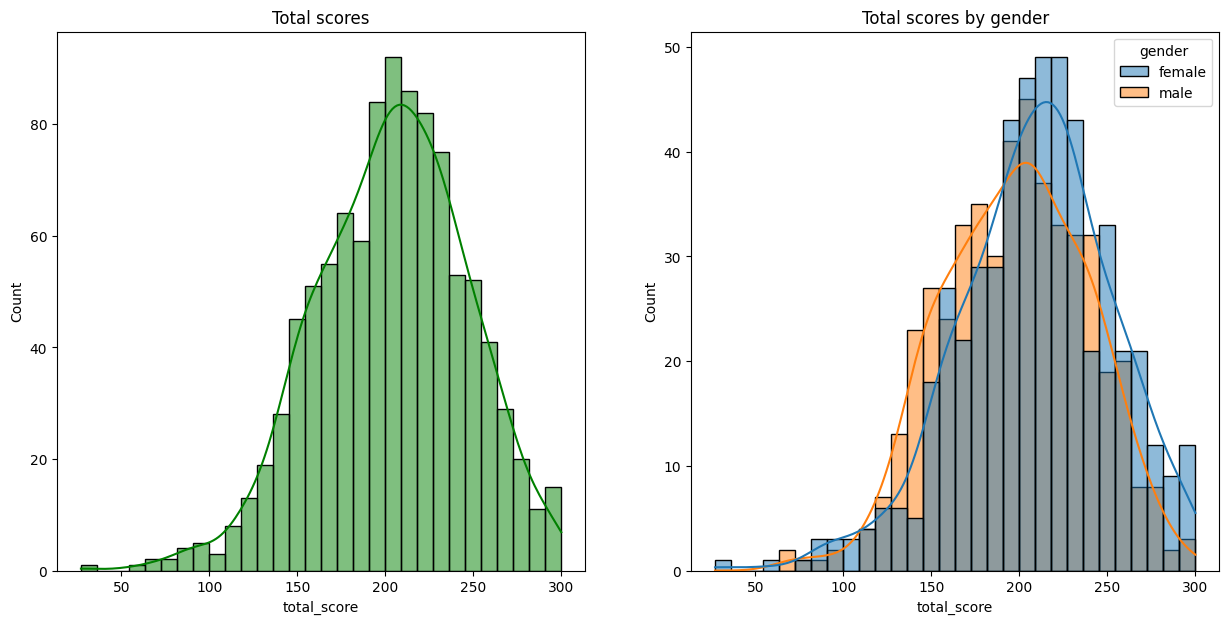

In [45]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.title("Total scores")

plt.subplot(122)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, hue = 'gender')
plt.title("Total scores by gender")

plt.show()

### Same observation in total scores

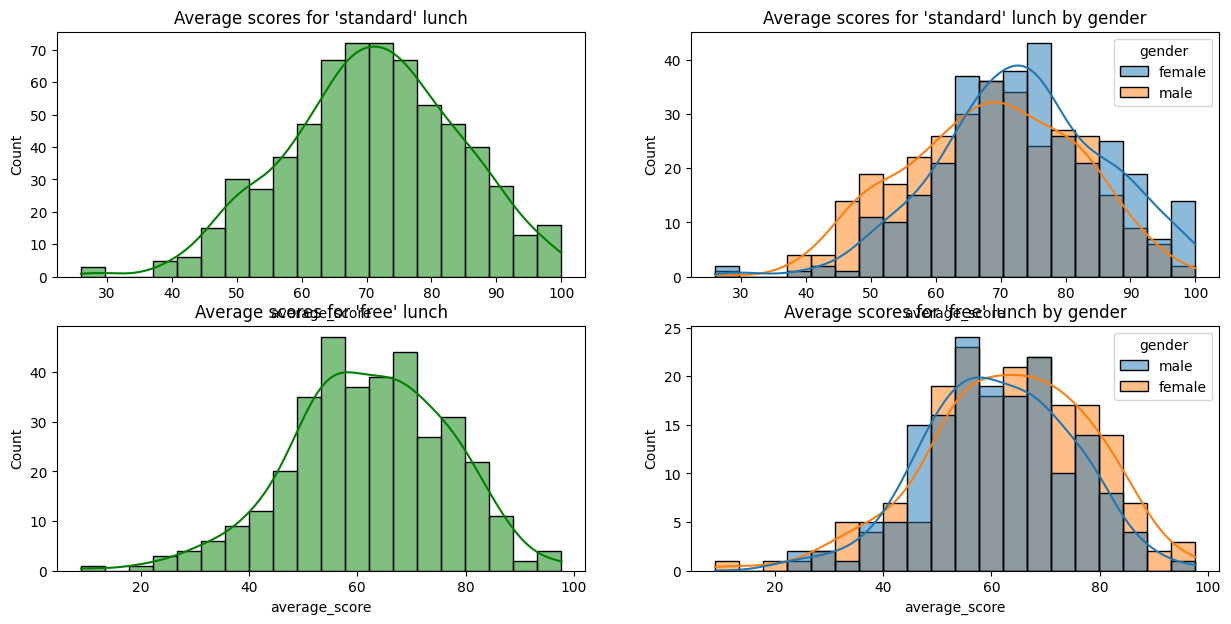

In [48]:
fig, ax = plt.subplots(2,2, figsize = (15,7))

# Check distributions with lunch
temp = df.loc[df['lunch'] == 'standard',:]
plt.subplot(221)
sns.histplot(data = temp, x = 'average_score', bins = 20, kde = True, color = 'g')
plt.title("Average scores for 'standard' lunch")

plt.subplot(222)
sns.histplot(data = temp, x = 'average_score', bins = 20, kde = True, hue = 'gender')
plt.title("Average scores for 'standard' lunch by gender")

# Check distributions without lunch
temp = df.loc[df['lunch'] != 'standard',:]
plt.subplot(223)
sns.histplot(data = temp, x = 'average_score', bins = 20, kde = True, color = 'g')
plt.title("Average scores for 'free' lunch")

plt.subplot(224)
sns.histplot(data = temp, x = 'average_score', bins = 20, kde = True, hue = 'gender')
plt.title("Average scores for 'free' lunch by gender")

# Show plot
plt.show()

### Lunch does not seem to significantly affect the scores of students across genders